In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import fftpack
%matplotlib notebook

In [3]:
k2 = pd.read_csv('/Devel/k2/data/C4/COOL/210451321.csv')

In [4]:
k2 = pd.read_csv('/Devel/k2/data/C4/COOL/210451321.csv')
k2.columns = ['time','flux','error']

In [ ]:
thresh_value = np.mean(k2['flux'])+2.5*np.std(k2['flux'])

In [ ]:
thresh_line=np.ones(len(k2['time']))*thresh_value

In [ ]:
k2[k2['flux']>thresh_value].flux.count()

In [ ]:
hist = np.histogram(k2['flux'], bins=15)

In [ ]:
ticks=map(str,map(int,hist[1][1:]))

In [ ]:
map(int,hist[0])

In [ ]:
plt.bar(range(len(hist[0])),hist[0],tick_label=ticks)

In [ ]:
np.mean(k2['flux'])+2.5*np.std(k2['flux'])

In [ ]:
Ns = [5,50]
plt.plot(k2['flux'])
for N in Ns:
    plt.plot(np.convolve(k2['flux'], np.ones((N,))/N, mode='full'))
labels = np.append([0], Ns)
plt.legend(labels, loc='upper right')

In [ ]:
n_std_dev = 2.5
N = 30
thresh_value = np.mean(k2['flux'])+n_std_dev*np.std(k2['flux'])

In [ ]:
plt.plot(k2['flux'])
plt.plot(np.convolve(k2['flux'], np.ones((N,))/N, mode='full') + thresh_value)

In [ ]:
threshold_array = np.convolve(k2['flux'], np.ones((N,))/N, mode='full') + thresh_value

In [ ]:
flare_array = np.zeros(len(k2['flux']))

In [ ]:
for index in range(len(k2['flux'])):
    if k2['flux'][index] > threshold_array[index]:
        flare_array[index] =  k2['flux'][index]

In [ ]:
plt.plot(k2['time'],k2['flux'])

In [ ]:
len(flare_array[flare_array>0])

In [ ]:
flares_df = pd.read_csv('/Devel/k2/flares.csv')

In [ ]:
def test_func(x, a, b, c):
    return a * np.sin(b * x) +c

In [ ]:
k2_30 = pd.read_csv('/Devel/k2/data/C4/COOL/210459199.csv') # 210579563 210700098

In [ ]:
k2_30.columns = ['time','flux','error']

In [ ]:
x_data = k2['time']
y_data = k2['flux']

In [ ]:
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

In [ ]:
plt.plot(x_data, y_data)

In [ ]:
x_data = k2['time']
y_data = k2['flux']

In [ ]:
x_data.values

In [ ]:

params, params_covariance = curve_fit(test_func,  x_data,y_data,
                                               p0=[10, 3, 5000])

In [ ]:
params

In [ ]:
from numpy import pi, r_

In [ ]:
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))

In [ ]:
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

In [ ]:
# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

In [ ]:
# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)


In [ ]:
p0 = [60., 1.5, 10, .5] # Initial guess for the parameters
p3, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p3,success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
p3

In [ ]:
plt.plot(x_data, fitfunc(p3, x_data))
plt.plot(x_data, y_data, 'r-')

In [ ]:
p0 = [25., 0.9, 100, 100., .03, 10., 0.] # Initial guess for the parameters
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*np.cos(2*np.pi/p[4]*x+p[5]) + p[6]*x
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p4,success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
p4

In [ ]:
p4=[4.93372630e+03,   2.27757883e+00,   2.92263097e+04,
         1.84129851e+03,   3.00972371e-01,   1.54301177e+03,
        -3.53885845e-01]

In [ ]:
t

In [ ]:

f1 = 40  # Frequency, in cycles per second, or Hertz
f2 = 12
f_s = 3000  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = 2000*np.sin(f1 * 2 * np.pi * t - .5)+ 12000*np.sin(f2 * 2 * np.pi * t + 1.2)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(t)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [ ]:
x_data_new[1]-x_data_new[0]

In [ ]:
dt = x_data_new[1]-x_data_new[0]

In [ ]:
dt = x_data_new[1]-x_data_new[0]
cycles_per_day = 1/dt

In [ ]:
cycles_per_day

In [ ]:
f_s = cycles_per_day  # Sampling rate, or number of measurements per day

fig, ax = plt.subplots()
ax.scatter(x_data_new, y_data_new)
ax.set_xlabel('Time [days]')
ax.set_ylabel('Signal amplitude');


In [ ]:
dt = x_data_new[1]-x_data_new[0]
cycles_per_day = 1/dt
X = fftpack.fft(y_data_new)
freqs = fftpack.fftfreq(len(y_data_new)) * f_s

In [ ]:
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Cycles/Day')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 5)
ax.set_ylim(-5, np.max(abs(X)))
plt.savefig('fft_')

In [ ]:
freqs[freqs>0]

In [ ]:
mags = np.abs(X[np.where(freqs>0.01)])

In [ ]:
np.max(mags)

In [ ]:
mags = np.abs(X[np.where(freqs>0.01)])
ind = np.argpartition(mags,-2)[-2:]

In [ ]:
freqs[ind]

In [ ]:
mags[ind].max()/mags[ind].min()

In [ ]:
mags[ind][2]/mags[ind][1]

In [ ]:
p = [mags[ind][1], 1/freqs[ind][1], 0, 0]

In [ ]:
p

In [ ]:
multifitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x
errfunc = lambda p, x, y: multifitfunc(p, x) - y # Distance to the target function
p0 = p # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
p1

In [ ]:
plt.plot(x_data,multifitfunc(p1, x_data))

In [ ]:
N = 50

In [ ]:
y_data_sub = y_data-multifitfunc(p1, x_data)
thresh_value = np.mean(y_data)+1.5*np.std(y_data)
k2_30_sub_low_pass = np.convolve(y_data_sub, np.ones((N,))/N, mode='full')
k2_30_sub_low_pass = k2_30_sub_low_pass[(len(k2_30_sub_low_pass) - len(y_data))/2:-(len(k2_30_sub_low_pass) - len(y_data))/2]

In [ ]:
len(y_data_sub), len(x_data), len(multifitfunc(p1, x_data)), len(y_data),len(k2_30_sub_low_pass)

In [ ]:
(len(k2_30_sub_low_pass) - len(y_data))/2

In [ ]:
len(k2_30_sub_low_pass[(len(k2_30_sub_low_pass) - len(y_data))/2:-(len(k2_30_sub_low_pass) - len(y_data))/2])

In [ ]:
plt.plot(x_data, y_data)

In [ ]:
plt.scatter(x_data,y_data_sub)

In [ ]:
fig, ax = plt.subplots()

ax.stem(x_data, k2_30_sub[])

In [ ]:
flairs = []
flairs_time = np.zeros(len(k2_30_sub))
for idx, row in k2_30_sub.iterrows():
    if row['flux']>k2_30_sub_low_pass[idx]:
        flairs_time[idx] = row['flux']
        flairs.append(row['flux'])

In [ ]:
plt.scatter(x_data, flairs_time)

In [ ]:
np.mean(flairs)

In [ ]:
flairs_z_score = (flairs - np.mean(flairs))/np.std(flairs)

In [ ]:
hist = np.histogram(flairs_z_score, bins=15)

In [ ]:
hist

In [ ]:
plt.hist(flairs_z_score[flairs_z_score>0])

In [ ]:
flairs_z_score[flairs_z_score>0]

In [ ]:
ticks=map(str,map(int,hist[1][1:]))
len(ticks)

In [ ]:
plt.show()

In [ ]:
thresh_value = np.mean(k2_30_sub_low_pass + 4*np.std(k2_30_sub_low_pass))

In [ ]:
thresh_value

In [ ]:
thresh_array = np.zeros(len(x_data)) + thresh_value

In [ ]:
plt.plot(x_data, y_data_sub)
plt.plot(x_data, thresh_array)

In [ ]:
flux = k2_30_sub['flux']

In [ ]:
flair_points = flux[flux>thresh_value]

In [ ]:
indices = np.array(flair_points.index)

In [ ]:
indices.dtype

In [ ]:
it = np.nditer(indices, flags=['c_index'])

In [ ]:
flairs = 0
above_thresh = False
while not it.finished:
    if (it.index < len(indices)-1) and (indices[it.index +1] - indices[it.index] == 1) and not above_thresh:
        above_thresh = True
        print indices[it.index]
        flairs += 1
    else:
        above_thresh = False
    it.iternext() 
print(flairs)

In [ ]:
# Magnitude 1, period 1, phase 1, magnitude2, phase2, offset

pm = [mags[ind][0], 1/freqs[ind][0], 0, mags[ind][1], 1/freqs[ind][1], 0, 0]

In [ ]:
mags

In [ ]:
pm

In [ ]:
multifitfunc2 = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*np.cos(2*np.pi/p[4]*x+p[5]) +p[6]*x
errfunc = lambda p, x, y: multifitfunc2(p, x) - y # Distance to the target function
p0 = pm # Initial guess for the parameters
p1m, success = optimize.leastsq(errfunc, p0[:], args=(x_data, y_data))

In [ ]:
fit = multifitfunc2(p1m, x_data)

In [ ]:
p1m

In [ ]:
plt.plot(x_data,y_data)
plt.plot(x_data,10*fit+5000)

In [ ]:
from scipy.interpolate import CubicSpline

In [ ]:
cs = CubicSpline(x_data, y_data)

In [ ]:
x_data[0],x_data.values[-1]

In [ ]:
xs = np.arange(x_data[0], x_data.values[-1], 1)

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_data, cs(x_data),'-r')

In [5]:
x1_data = k2['time']
y1_data = k2['flux']

<IPython.core.display.Javascript object>


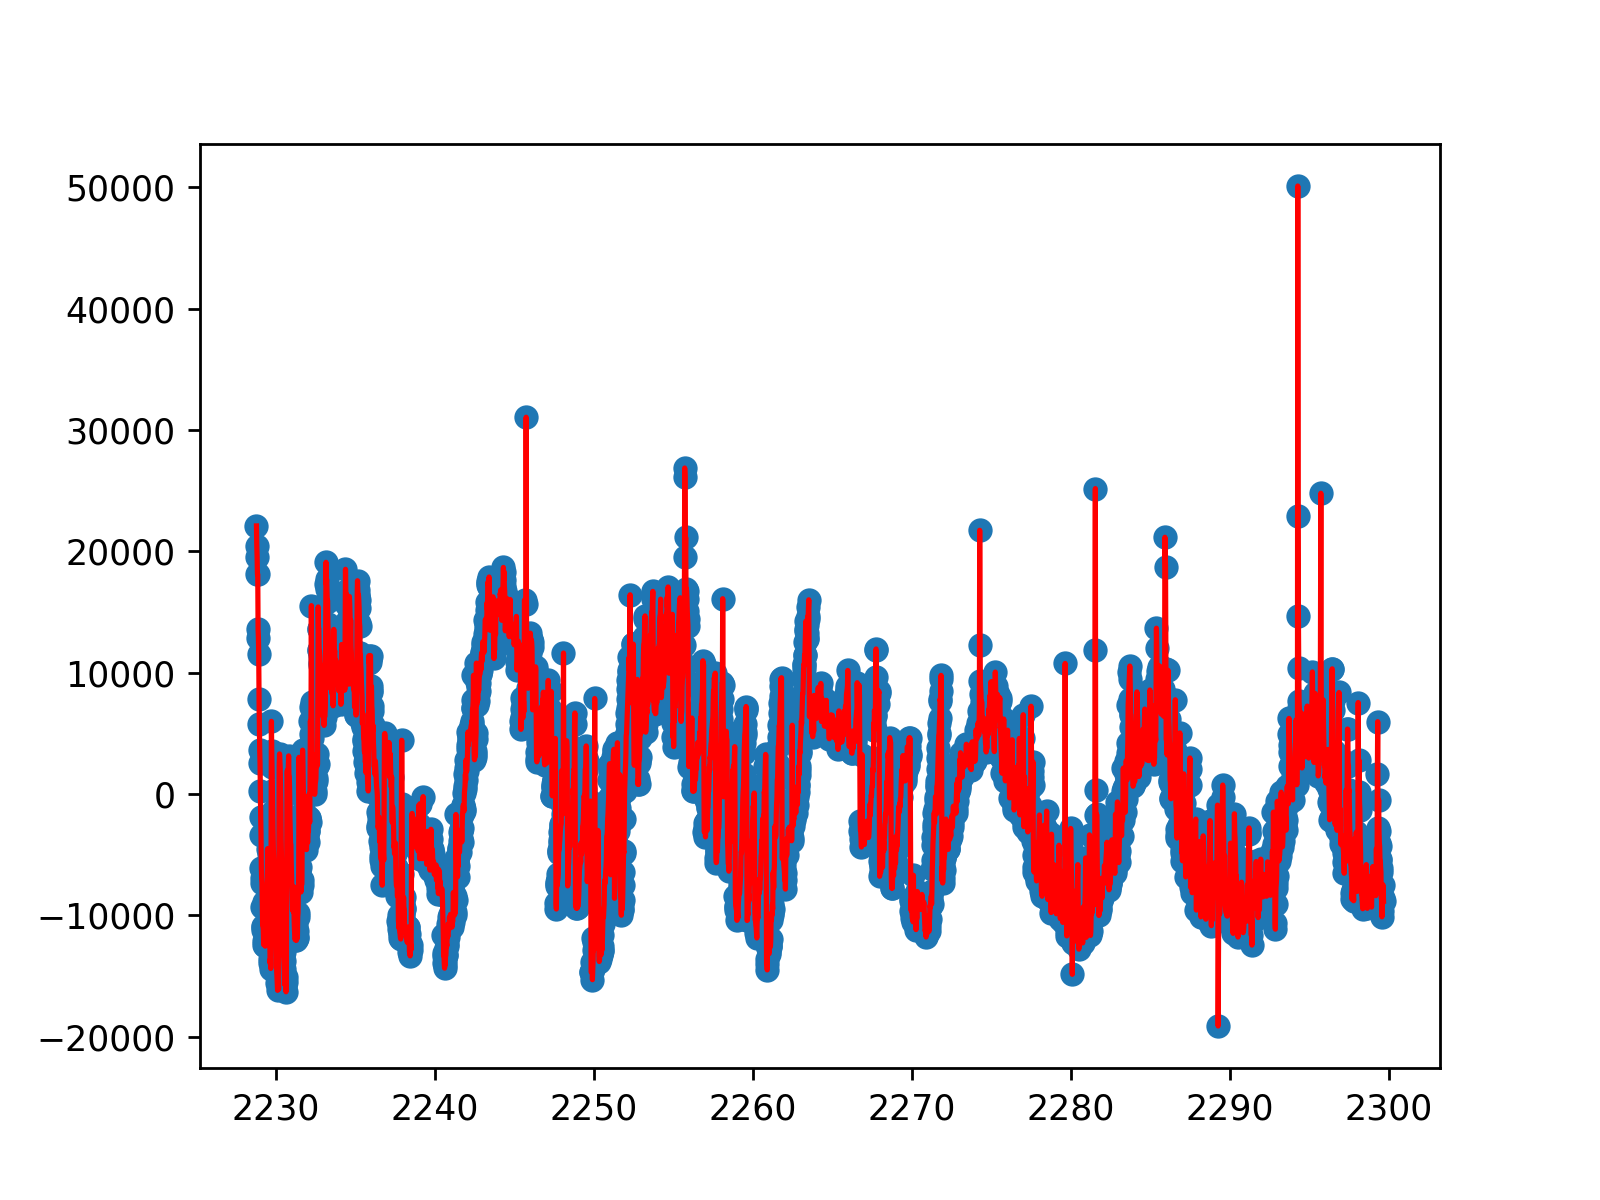

In [6]:
plt.scatter(x1_data,y1_data)
plt.plot(x1_data, y1_data,'-r')

In [7]:
it = np.nditer(y1_data, flags=['c_index'])

In [8]:
d1 = np.zeros(len(x1_data))
dt = np.zeros(len(x1_data))
while not it.finished:
    if it.index < len(y1_data)-1:
        dt[it.index] = x1_data[it.index + 1] - x1_data[it.index]
        d1[it.index] = (y1_data[it.index + 1] - y1_data[it.index])/(x1_data[it.index + 1] - x1_data[it.index])
    
    it.iternext() 
    

In [27]:
d1

array([-80373.23529279, -44122.09756177, -71106.61764589, ...,
        54254.64215718, -33462.39853304,      0.        ])

In [9]:
pos_threshold = np.std(d1[d1>0])+np.mean(d1[d1>0])
neg_threshold = -np.std(d1[d1<0])+np.mean(d1[d1<0])

In [10]:
pos_threshold_line = np.zeros(len(x1_data)) + pos_threshold
neg_threshold_line = np.zeros(len(x1_data)) + neg_threshold

<IPython.core.display.Javascript object>


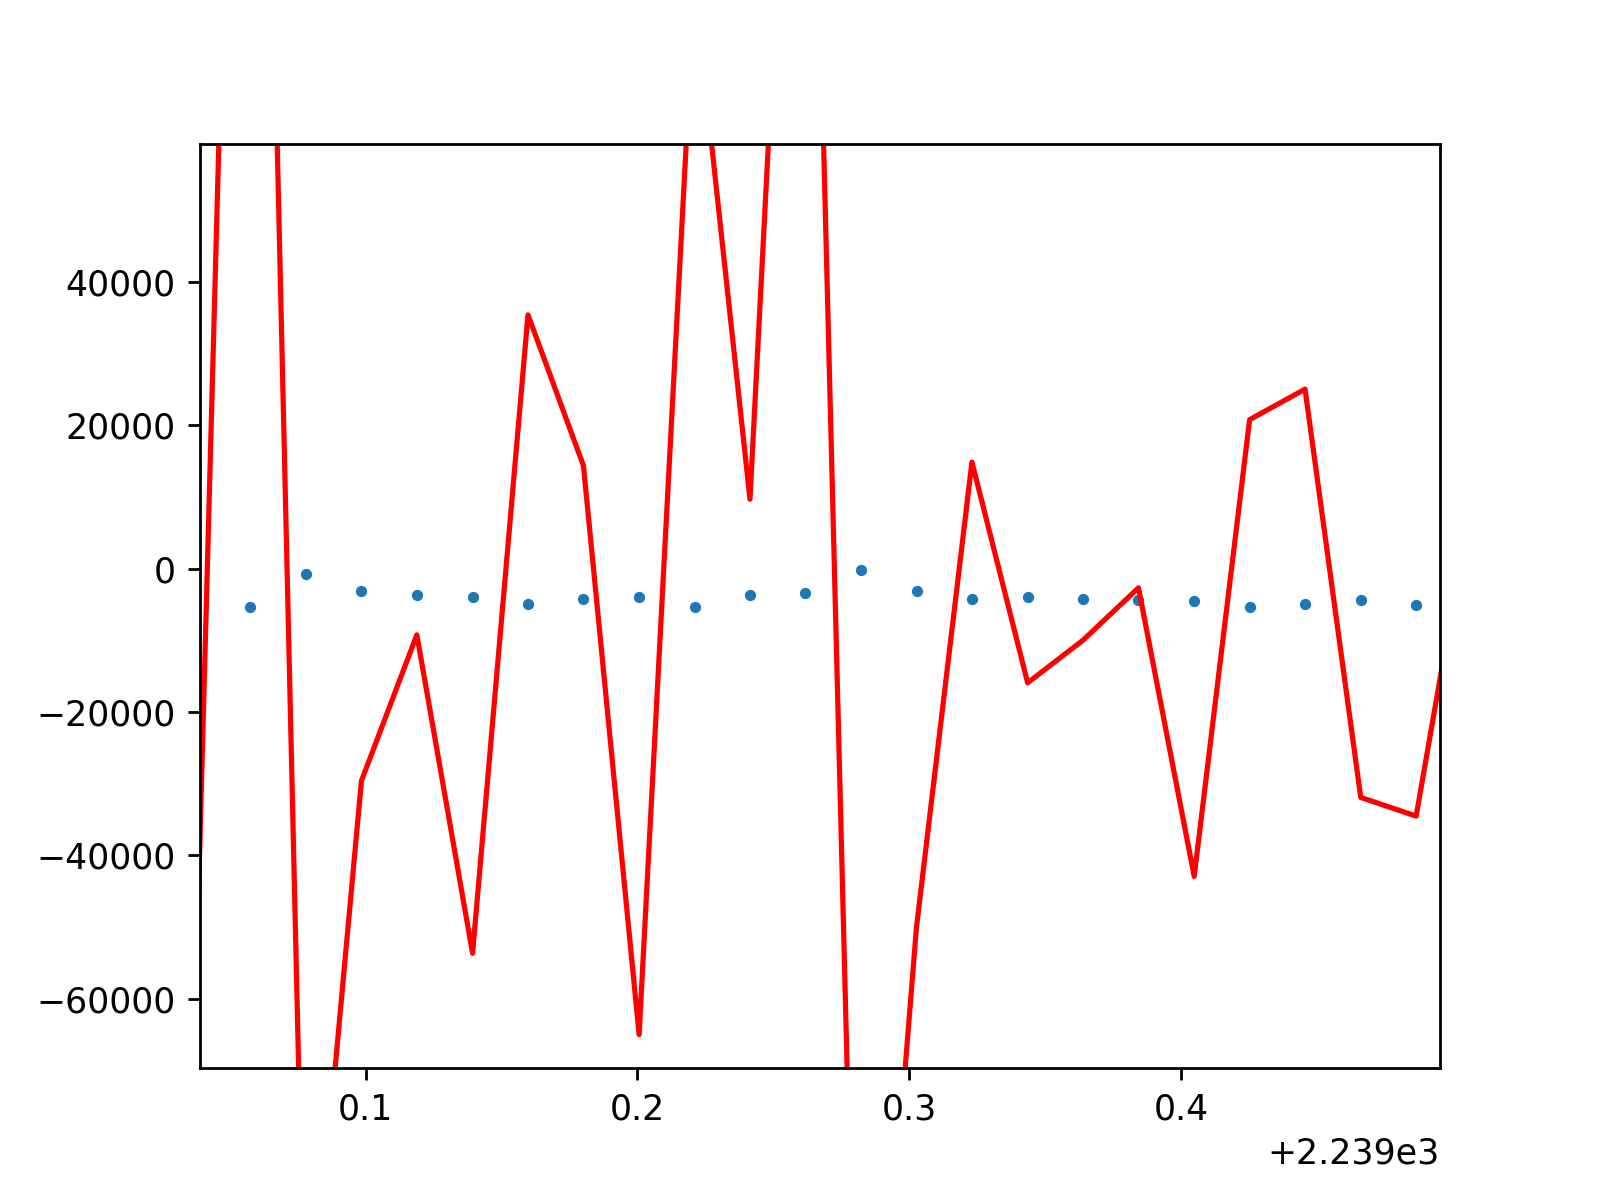

In [14]:

plt.scatter(x1_data, y1_data, s=5)
plt.plot(x1_data, d1,'-r')


<IPython.core.display.Javascript object>


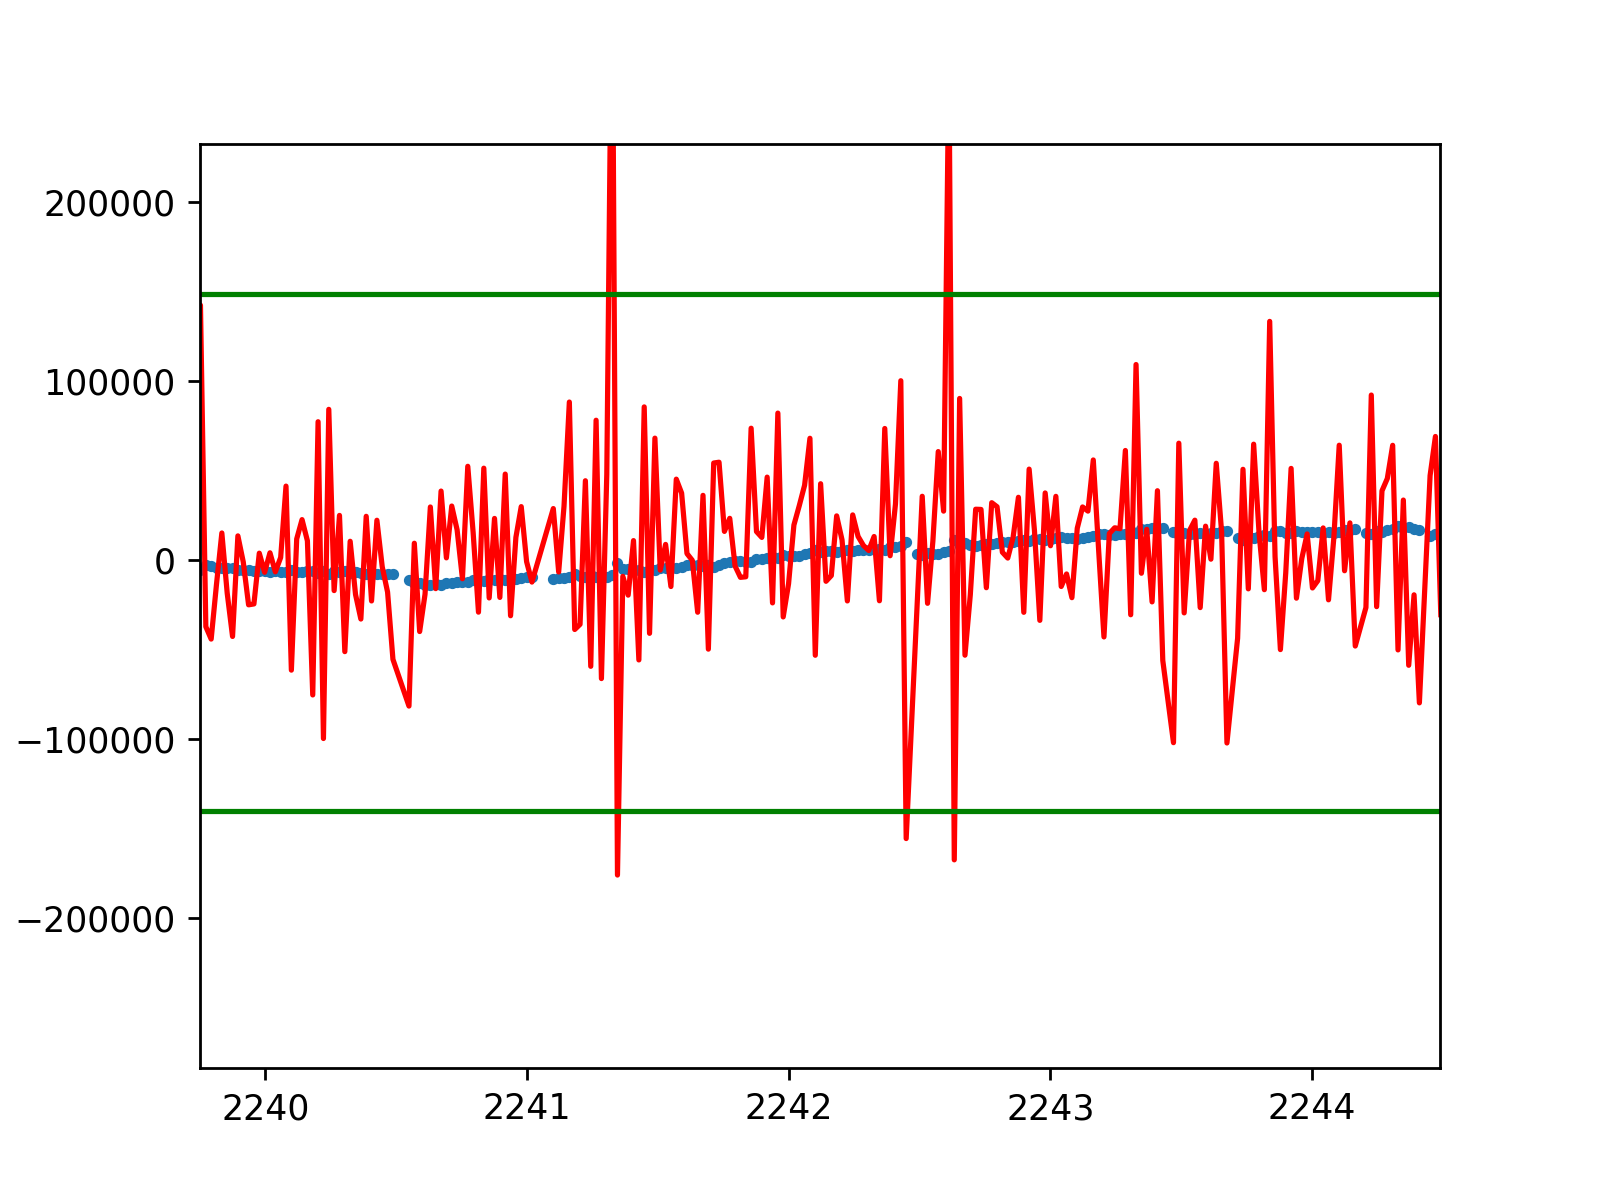

In [19]:
plt.plot(x1_data, d1,'-r')
plt.scatter(x1_data, y1_data, s=5)

plt.plot(x1_data, pos_threshold_line,'-g')
plt.plot(x1_data, neg_threshold_line,'-g')

In [ ]:
x1_data[np.nonzero(d1>pos_threshold)[0]]

In [20]:
np.where(d1>pos_threshold)[0]

array([  23,   32,   36,   43,   66,   89,  125,  135,  158,  161,  181,
        204,  227,  261,  272,  295,  330,  376,  427,  428,  457,  478,
        482,  492,  588,  650,  789,  790,  795,  860,  899,  905,  938,
        946,  996,  997, 1007, 1099, 1108, 1234, 1259, 1371, 1520, 1577,
       1785, 1827, 1881, 1940, 2142, 2188, 2272, 2291, 2349, 2388, 2397,
       2409, 2472, 2473, 2527, 2563, 2623, 2641, 2665, 2695, 2707, 2735,
       2792, 2811, 2815, 2825, 2859, 2910, 2980, 2989, 3013, 3039, 3087,
       3103, 3110, 3134, 3156, 3176, 3179, 3201, 3205, 3211, 3263, 3266,
       3267])

In [21]:
np.where(d1<neg_threshold)[0]

array([   4,    7,   38,   72,  126,  127,  128,  162,  163,  429,  430,
        431,  493,  589,  643,  651,  779,  791,  796,  797,  825,  861,
        871,  882,  906,  917,  940,  947,  975,  986,  998, 1009, 1044,
       1055, 1070, 1100, 1110, 1121, 1144, 1167, 1190, 1213, 1224, 1247,
       1261, 1263, 1270, 1315, 1350, 1372, 1373, 1384, 1407, 1442, 1465,
       1500, 1547, 1578, 1629, 1779, 1786, 1838, 1873, 1932, 1941, 2027,
       2143, 2144, 2259, 2270, 2273, 2294, 2297, 2337, 2389, 2392, 2398,
       2408, 2425, 2447, 2458, 2474, 2479, 2667, 2668, 2696, 2708, 2738,
       2752, 2813, 2814, 2833, 2898, 2974, 3040, 3041, 3042, 3094, 3104,
       3105, 3126, 3157, 3177, 3212, 3214, 3268])

In [11]:
d1_thresh = np.concatenate((np.where(d1>pos_threshold)[0], np.where(d1<neg_threshold)[0]))

In [12]:
indices = np.sort(d1_thresh)

In [25]:
y1_thresh_cross = np.zeros(len(x1_data))
y1_thresh_cross[indices] = 20000
y1_spikes = np.zeros(len(x1_data))
y1_spikes[flair_times]= 20000

<IPython.core.display.Javascript object>


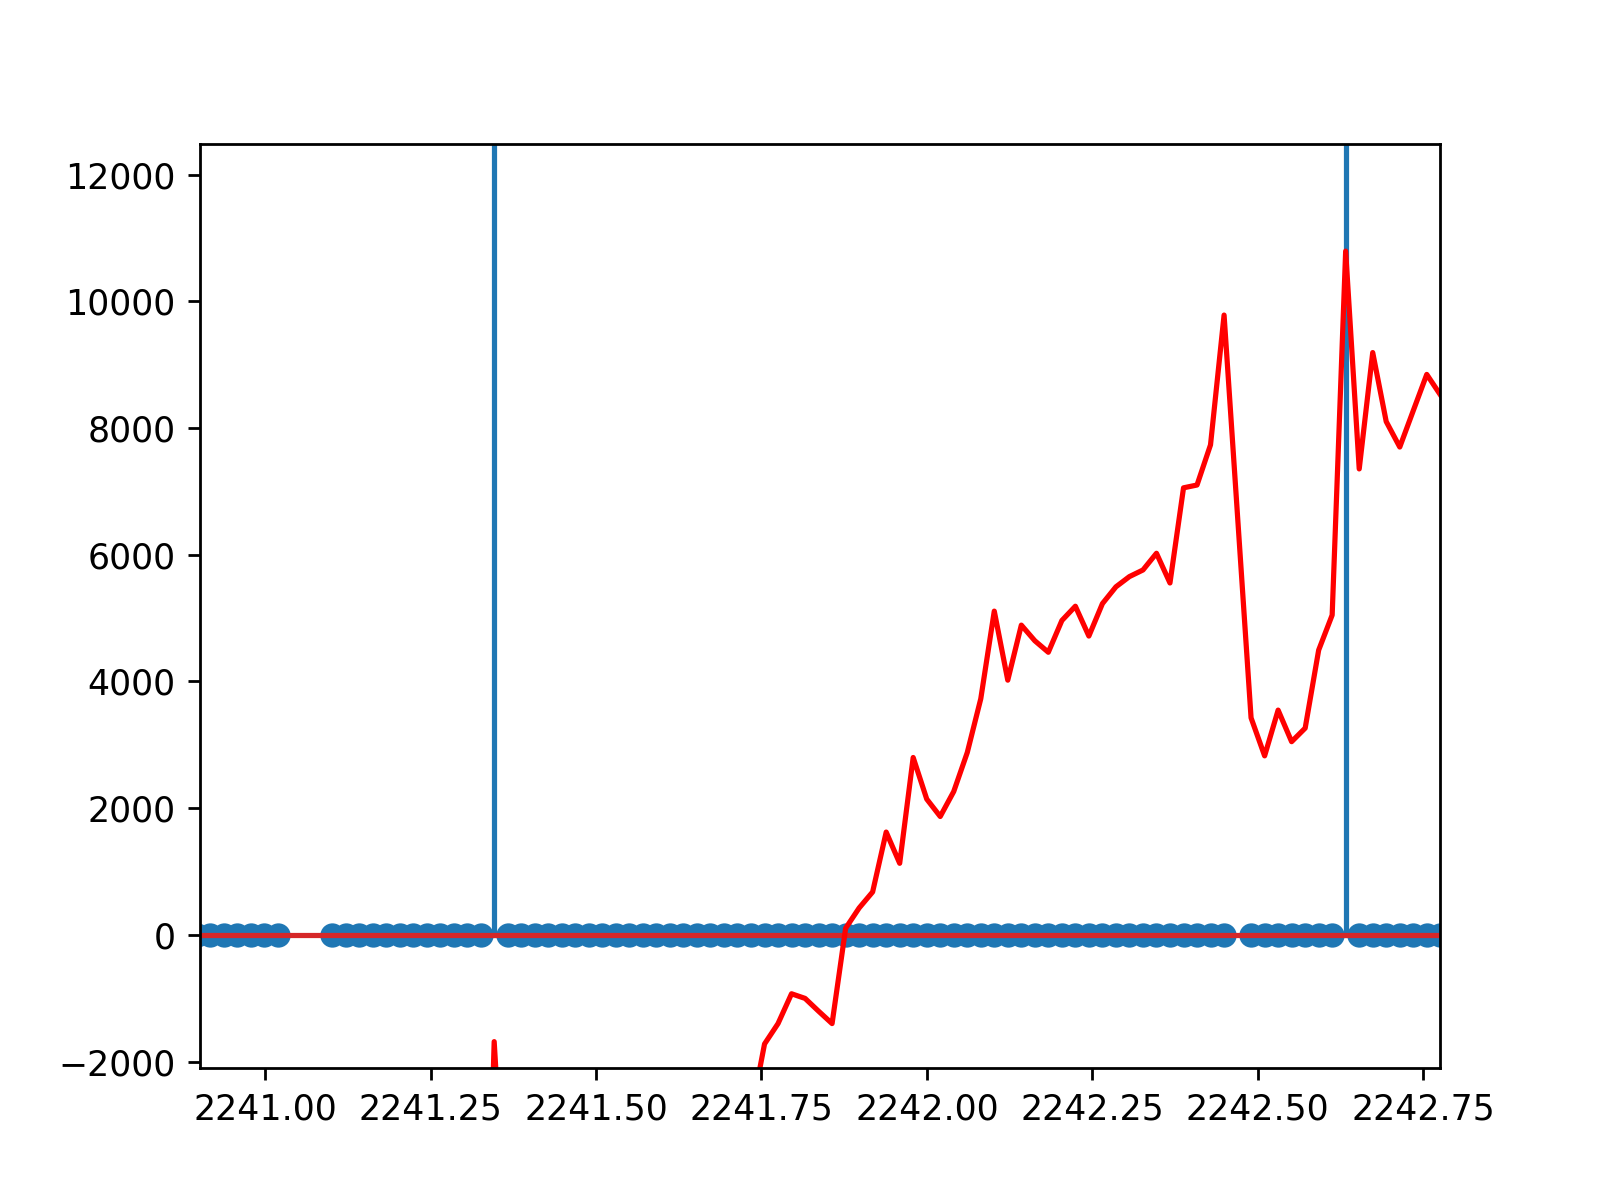

In [28]:
plt.stem(x1_data, y1_spikes,s=5)
plt.scatter(x1_data, y1_thresh_cross, s=3, c='g')
plt.plot(x1_data, y1_data, '-r')

In [21]:
it = np.nditer(indices, flags=['c_index'])
flairs = 0
above_thresh = False
flair_times = []
while not it.finished:
    if (it.index < len(indices)-1) and (indices[it.index +1] - indices[it.index] > 1) and not above_thresh:
        above_thresh = True
        flair_times.append(indices[it.index])
        flairs += 1
    else:
        above_thresh = False
    it.iternext() 
print(flairs)

79


In [ ]:
f = interpolate.interp1d(x_data, y_data)

In [22]:
flair_times

[4,
 23,
 36,
 43,
 72,
 128,
 158,
 163,
 204,
 261,
 295,
 376,
 431,
 478,
 493,
 589,
 651,
 791,
 797,
 861,
 882,
 906,
 938,
 947,
 986,
 998,
 1009,
 1055,
 1100,
 1110,
 1144,
 1190,
 1224,
 1247,
 1261,
 1270,
 1350,
 1373,
 1407,
 1465,
 1520,
 1578,
 1779,
 1786,
 1838,
 1881,
 1941,
 2144,
 2259,
 2273,
 2294,
 2337,
 2389,
 2398,
 2409,
 2447,
 2474,
 2527,
 2623,
 2665,
 2668,
 2696,
 2708,
 2738,
 2792,
 2815,
 2833,
 2898,
 2974,
 2989,
 3042,
 3094,
 3105,
 3126,
 3157,
 3177,
 3201,
 3212,
 3263]

In [ ]:
y_data_new = f(x_data_new)

In [ ]:
x_data_new = np.arange(x_data.min(), x_data.max(), .02)

In [ ]:
len(x_data_new),len(y_data_new)

In [ ]:
plt.scatter(x_data_new,y_data_new)

In [12]:
k2 = pd.read_csv('/Devel/k2/data/C4/COOL/210865020.csv')
k2.columns = ['time','flux','error']
x_data = k2['time']
y_data = k2['flux']
f = interpolate.interp1d(x_data, y_data)
x_data_new = np.arange(x_data.min(), x_data.max(), .02)
y_data_new = f(x_data_new)

In [13]:
dt = x_data_new[1]-x_data_new[0]
cycles_per_day = 1/dt
X = fftpack.fft(y_data_new)
freqs = fftpack.fftfreq(len(y_data_new)) * cycles_per_day

<IPython.core.display.Javascript object>


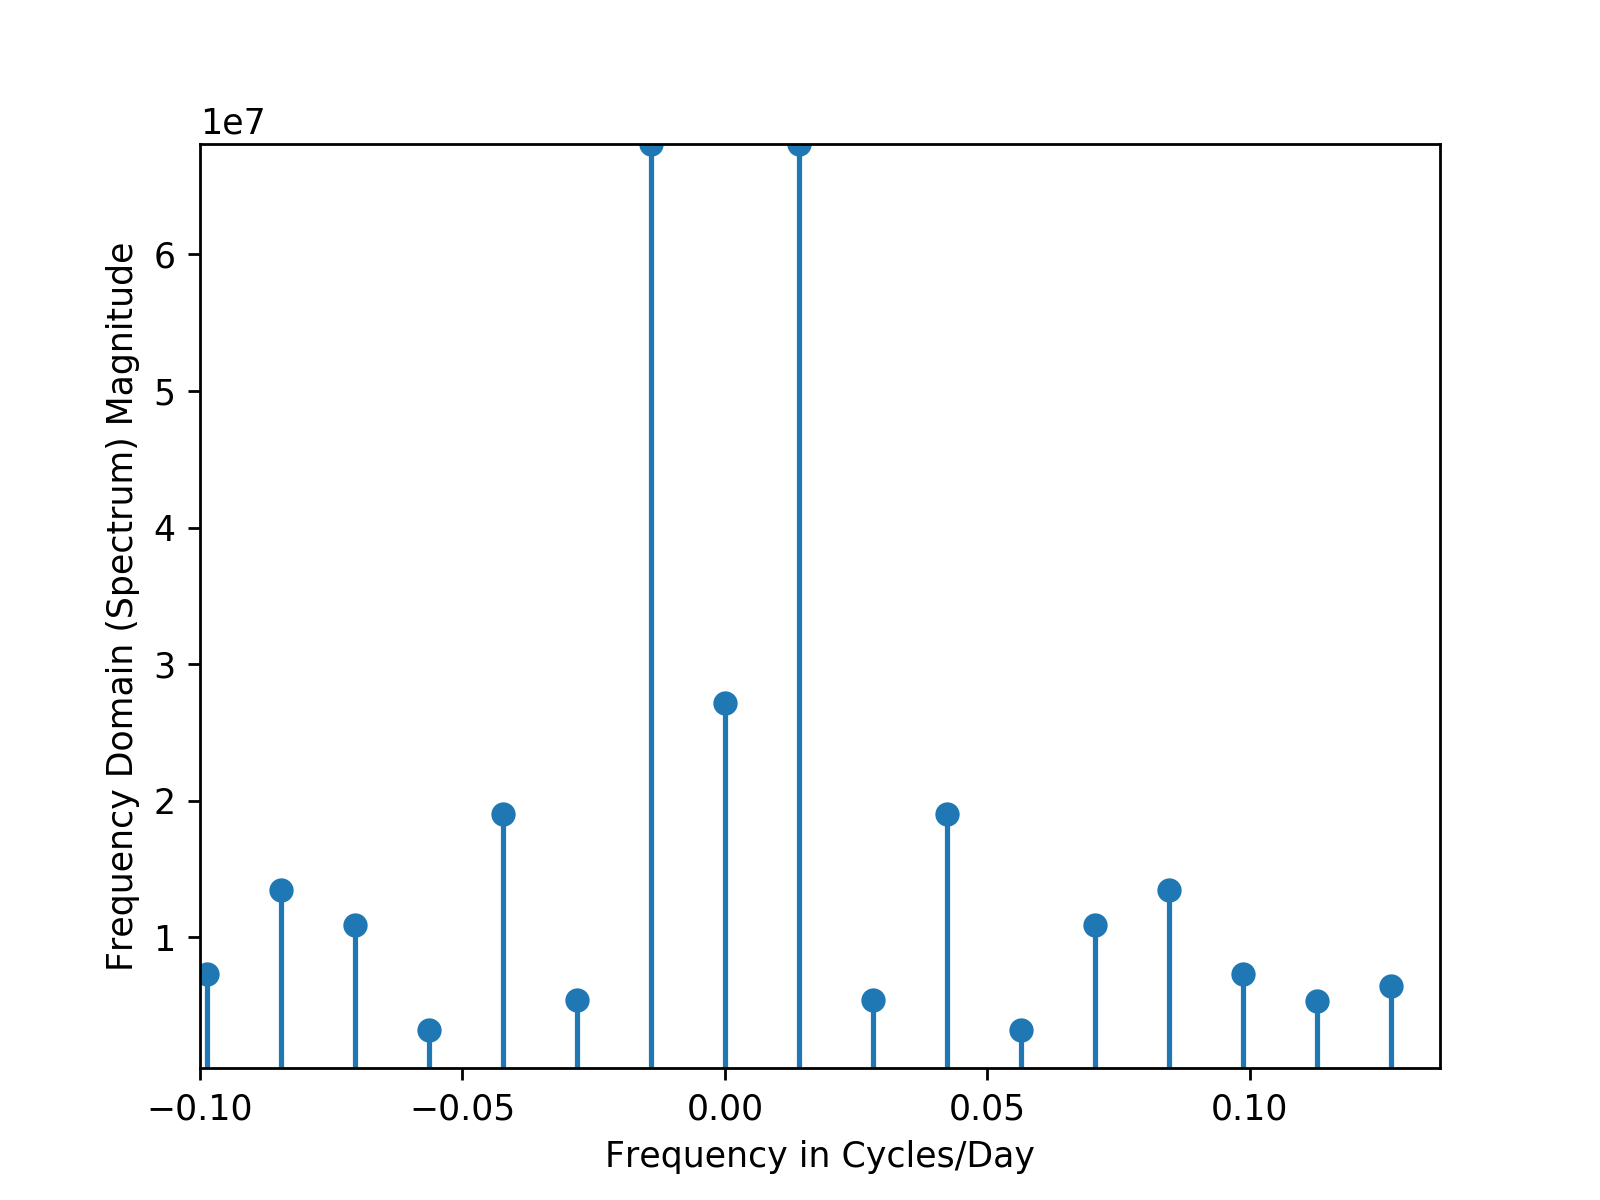

(-5, 68087129.795518145)

In [22]:
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Cycles/Day')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-.1, 5)
ax.set_ylim(-5, np.max(abs(X)))

In [42]:
abs_x = np.abs(X)

In [48]:
mags = abs_x[np.where(freqs>0)]
ind = np.argpartition(mags,-2)[-2:]

In [53]:
pos_freqs = freqs[np.where(freqs>0)]

In [54]:
mags[ind]

array([ 19028607.75716174,  68087129.79551814])

In [56]:
pos_freqs[ind]

array([ 0.04232506,  0.01410835])

In [57]:
np.argmax(mags)

0

In [59]:
pos_freqs[np.argmax(mags)]

0.014108352144482356

In [17]:
mags[ind].max()/mags[ind].min()

3.5781456354783696

In [10]:
mags[ind].max()

3620612.3807966686